## Index

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from pymongo import MongoClient

In [3]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.simplefilter(action='ignore', category=Warning)

## Reading data from MongoDB

In [4]:
client = MongoClient("mongodb://localhost:27017")

In [5]:
# using the find method without a filter to read all records

results = client['DAP_Project_DB']['greenhouse_gas_emission'].find()

df1 = pd.DataFrame(results)

df1 = df1.iloc[:, 1:] # removing the 1st column

In [6]:
df1.head()

gross  net conventional_accounting economic_sector  sector         category  \
0   Yes  Yes                     Yes       Buildings  Energy  Fuel Combustion   
1   Yes  Yes                     Yes       Buildings  Energy  Fuel Combustion   
2   Yes  Yes                     Yes       Buildings  Energy  Fuel Combustion   
3   Yes  Yes                     Yes       Buildings  Energy  Fuel Combustion   
4   Yes  Yes                     Yes       Buildings  Energy  Fuel Combustion   

  sub_category_1  sub_category_2 sub_category_3  year  gas mt_co2e_ar5_20_yr  \
0     Commercial  Not Applicable           Coal  1990  CH4              4811   
1     Commercial  Not Applicable           Coal  1990  CO2            521347   
2     Commercial  Not Applicable           Coal  1990  N2O              2268   
3     Commercial  Not Applicable           Coal  1991  CH4              5067   
4     Commercial  Not Applicable           Coal  1991  CO2            550680   

  mt_co2e_ar4_100_yr  
0               1432  
1             521347  
2               2560  
3               1508  
4             550680

## Basic EDA

In [7]:
print('The number of rows:', df1.shape[0])
print('The number of columns:', df1.shape[1])

The number of rows: 13981
The number of columns: 13


In [8]:
# columns and their datatypes

df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13981 entries, 0 to 13980
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gross                    13981 non-null  object
 1   net                      13981 non-null  object
 2   conventional_accounting  13981 non-null  object
 3   economic_sector          13981 non-null  object
 4   sector                   13981 non-null  object
 5   category                 13981 non-null  object
 6   sub_category_1           13981 non-null  object
 7   sub_category_2           13981 non-null  object
 8   sub_category_3           13981 non-null  object
 9   year                     13981 non-null  object
 10  gas                      13981 non-null  object
 11  mt_co2e_ar5_20_yr        13981 non-null  object
 12  mt_co2e_ar4_100_yr       13981 non-null  object
dtypes: object(13)
memory usage: 1.4+ MB


- From the above observations of records, the below features are numerical datatype but are in datatype object
    - 'year', 
    - 'mt_co2e_ar5_20_yr', 
    - 'mt_co2e_ar4_100_yr' 
- We'll convert them in numerical datatype.

In [9]:
df1['year'] = df1['year'].astype(int) # integer for year

df1['mt_co2e_ar5_20_yr'] = df1['mt_co2e_ar5_20_yr'].astype(float)

df1['mt_co2e_ar4_100_yr'] = df1['mt_co2e_ar4_100_yr'].astype(float)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13981 entries, 0 to 13980
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gross                    13981 non-null  object 
 1   net                      13981 non-null  object 
 2   conventional_accounting  13981 non-null  object 
 3   economic_sector          13981 non-null  object 
 4   sector                   13981 non-null  object 
 5   category                 13981 non-null  object 
 6   sub_category_1           13981 non-null  object 
 7   sub_category_2           13981 non-null  object 
 8   sub_category_3           13981 non-null  object 
 9   year                     13981 non-null  int32  
 10  gas                      13981 non-null  object 
 11  mt_co2e_ar5_20_yr        13981 non-null  float64
 12  mt_co2e_ar4_100_yr       13981 non-null  float64
dtypes: float64(2), int32(1), object(10)
memory usage: 1.3+ MB


In [11]:
# statistical info of the numerical features

df1.describe(include = 'all').T

count unique                    top   freq  \
gross                      13981      2                    Yes  12710   
net                        13981      2                    Yes  12586   
conventional_accounting    13981      2                     No   7378   
economic_sector            13981      8               Industry   3937   
sector                     13981      4                 Energy  11935   
category                   13981     17  Imported Fossil Fuels   5952   
sub_category_1             13981     39         Transportation   4402   
sub_category_2             13981     43         Not Applicable   8711   
sub_category_3             13981     23         Not Applicable   2170   
year                     13981.0    NaN                    NaN    NaN   
gas                        13981      9                    CO2   4743   
mt_co2e_ar5_20_yr        13981.0    NaN                    NaN    NaN   
mt_co2e_ar4_100_yr       13981.0    NaN                    NaN    NaN   

                                  mean             std         min     25%  \
gross                              NaN             NaN         NaN     NaN   
net                                NaN             NaN         NaN     NaN   
conventional_accounting            NaN             NaN         NaN     NaN   
economic_sector                    NaN             NaN         NaN     NaN   
sector                             NaN             NaN         NaN     NaN   
category                           NaN             NaN         NaN     NaN   
sub_category_1                     NaN             NaN         NaN     NaN   
sub_category_2                     NaN             NaN         NaN     NaN   
sub_category_3                     NaN             NaN         NaN     NaN   
year                            2005.0        8.944592      1990.0  1997.0   
gas                                NaN             NaN         NaN     NaN   
mt_co2e_ar5_20_yr        929808.076819  4208021.321796 -27920000.0   646.0   
mt_co2e_ar4_100_yr        666211.35162  3671313.850462 -27920000.0   497.0   

                             50%       75%         max  
gross                        NaN       NaN         NaN  
net                          NaN       NaN         NaN  
conventional_accounting      NaN       NaN         NaN  
economic_sector              NaN       NaN         NaN  
sector                       NaN       NaN         NaN  
category                     NaN       NaN         NaN  
sub_category_1               NaN       NaN         NaN  
sub_category_2               NaN       NaN         NaN  
sub_category_3               NaN       NaN         NaN  
year                      2005.0    2013.0      2020.0  
gas                          NaN       NaN         NaN  
mt_co2e_ar5_20_yr        14481.0  202181.0  59162584.0  
mt_co2e_ar4_100_yr       10482.0  155691.0  59162584.0

In [12]:
# checking for null values

df1.isna().sum()

gross                      0
net                        0
conventional_accounting    0
economic_sector            0
sector                     0
category                   0
sub_category_1             0
sub_category_2             0
sub_category_3             0
year                       0
gas                        0
mt_co2e_ar5_20_yr          0
mt_co2e_ar4_100_yr         0
dtype: int64

### Differentiating Categorical & Numerical Features

In [13]:
cat_cols = list(df1.select_dtypes(include = 'object'))

print("Categorical Features:", len(cat_cols))
cat_cols

Categorical Features: 10


['gross',
 'net',
 'conventional_accounting',
 'economic_sector',
 'sector',
 'category',
 'sub_category_1',
 'sub_category_2',
 'sub_category_3',
 'gas']

In [14]:
num_cols = list(df1.select_dtypes(exclude = 'object'))

print("Numerical Features:", len(num_cols))
num_cols

Numerical Features: 3


['year', 'mt_co2e_ar5_20_yr', 'mt_co2e_ar4_100_yr']

*  There are 10 Categorical & 3 Numerical Features in our dataset.

### Categorical Variables

In [15]:
df1[cat_cols]

gross  net conventional_accounting economic_sector  sector  \
0       Yes  Yes                     Yes       Buildings  Energy   
1       Yes  Yes                     Yes       Buildings  Energy   
2       Yes  Yes                     Yes       Buildings  Energy   
3       Yes  Yes                     Yes       Buildings  Energy   
4       Yes  Yes                     Yes       Buildings  Energy   
...     ...  ...                     ...             ...     ...   
13976   Yes  Yes                     Yes       Buildings    IPPU   
13977   Yes  Yes                     Yes       Buildings    IPPU   
13978   Yes  Yes                     Yes       Buildings    IPPU   
13979   Yes  Yes                     Yes       Buildings    IPPU   
13980   Yes  Yes                     Yes       Buildings    IPPU   

              category   sub_category_1  sub_category_2  sub_category_3   gas  
0      Fuel Combustion       Commercial  Not Applicable            Coal   CH4  
1      Fuel Combustion       Commercial  Not Applicable            Coal   CO2  
2      Fuel Combustion       Commercial  Not Applicable            Coal   N2O  
3      Fuel Combustion       Commercial  Not Applicable            Coal   CH4  
4      Fuel Combustion       Commercial  Not Applicable            Coal   CO2  
...                ...              ...             ...             ...   ...  
13976      Product Use  ODS Substitutes      Industrial  Not Applicable  HFCs  
13977      Product Use  ODS Substitutes      Industrial  Not Applicable  HFCs  
13978      Product Use  ODS Substitutes      Industrial  Not Applicable  HFCs  
13979      Product Use  ODS Substitutes      Industrial  Not Applicable  HFCs  
13980      Product Use  ODS Substitutes      Industrial  Not Applicable  HFCs  

[13981 rows x 10 columns]

### Count of unique values in categorical columns

In [16]:
for col in cat_cols:
    frequency_table = df1[col].value_counts()
    print(f"Frequency table for {col}:\n{frequency_table}\n")

Frequency table for gross:
Yes    12710
No      1271
Name: gross, dtype: int64

Frequency table for net:
Yes    12586
No      1395
Name: net, dtype: int64

Frequency table for conventional_accounting:
No     7378
Yes    6603
Name: conventional_accounting, dtype: int64

Frequency table for economic_sector:
Industry          3937
Transportation    3689
Buildings         2387
Electricity       2046
Excluded           651
Net Emissions      620
Waste              465
Agriculture        186
Name: economic_sector, dtype: int64

Frequency table for sector:
Energy    11935
AFOLU       868
IPPU        713
Waste       465
Name: sector, dtype: int64

Frequency table for category:
Imported Fossil Fuels       5952
Fuel Combustion             5239
Land                         651
Other Fossil Fuel Use        372
Waste Combustion             248
Imported Electricity         248
Product Use                  248
Metals                       217
Electronics Industry         155
Wastewater               

### Uni-variate analysis

In [58]:
# make function for count plot for Categorical features

def Categorical_Plot(column,rotation,name):
    
        plt.figure(figsize=(30, 10))
        plt.subplot(1, 2, 1)
        sns.countplot(x=df1[column], data=df1);
        plt.xticks( horizontalalignment="center", fontsize=15, rotation = rotation )
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.ylabel("Count\n", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(name)} - Count\n", fontsize = 25)
        
        plt.show()
        print()

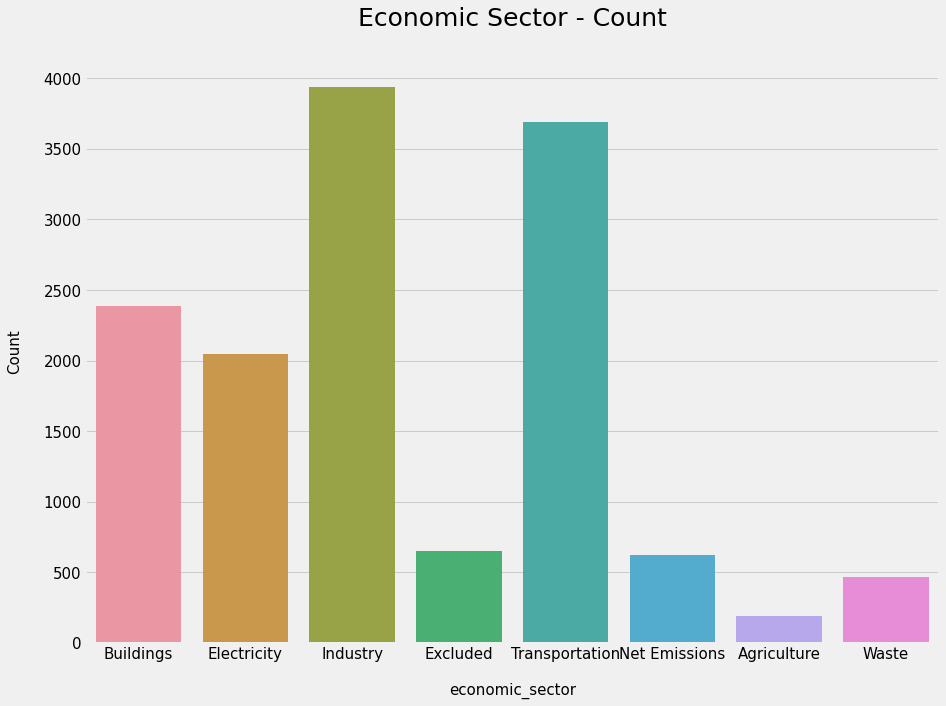

In [59]:
Categorical_Plot("economic_sector",rotation=0,name="Economic Sector")

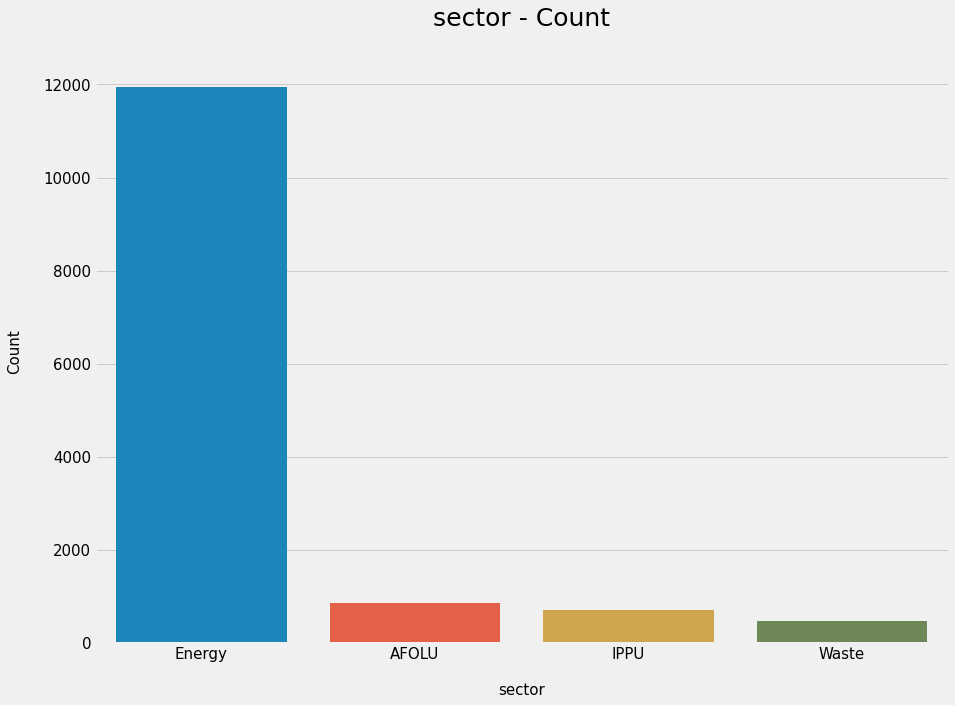

In [51]:
Categorical_Plot("sector",rotation=0)

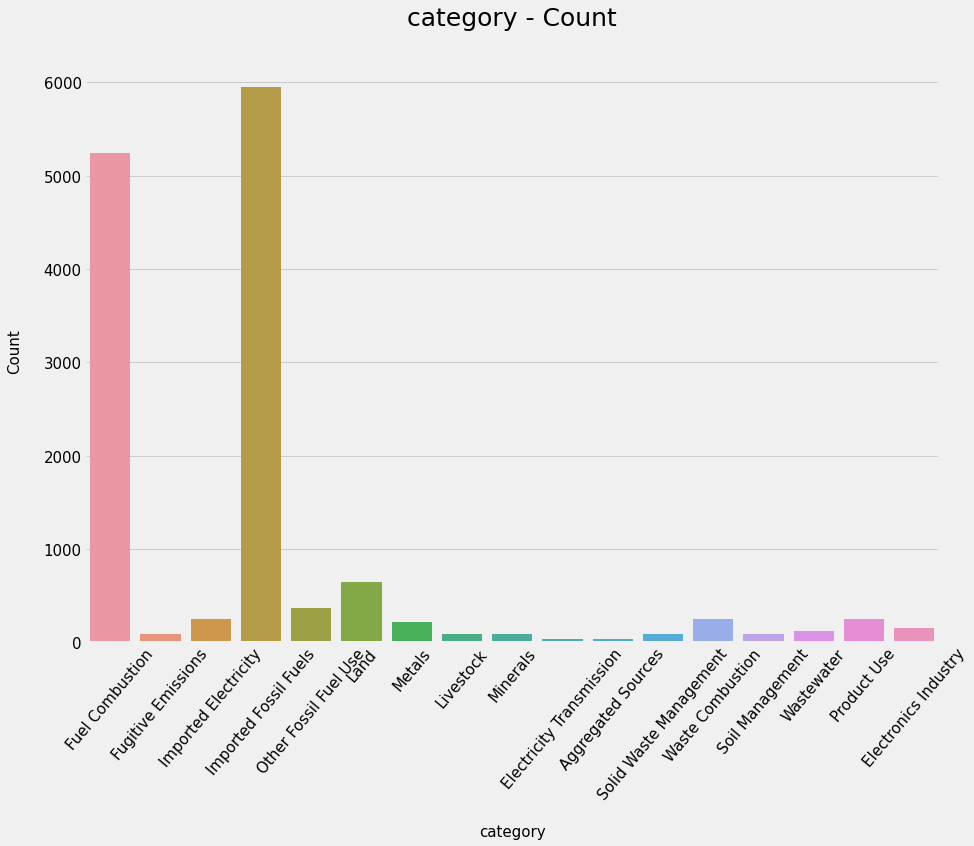

In [56]:
Categorical_Plot("category",rotation=50)

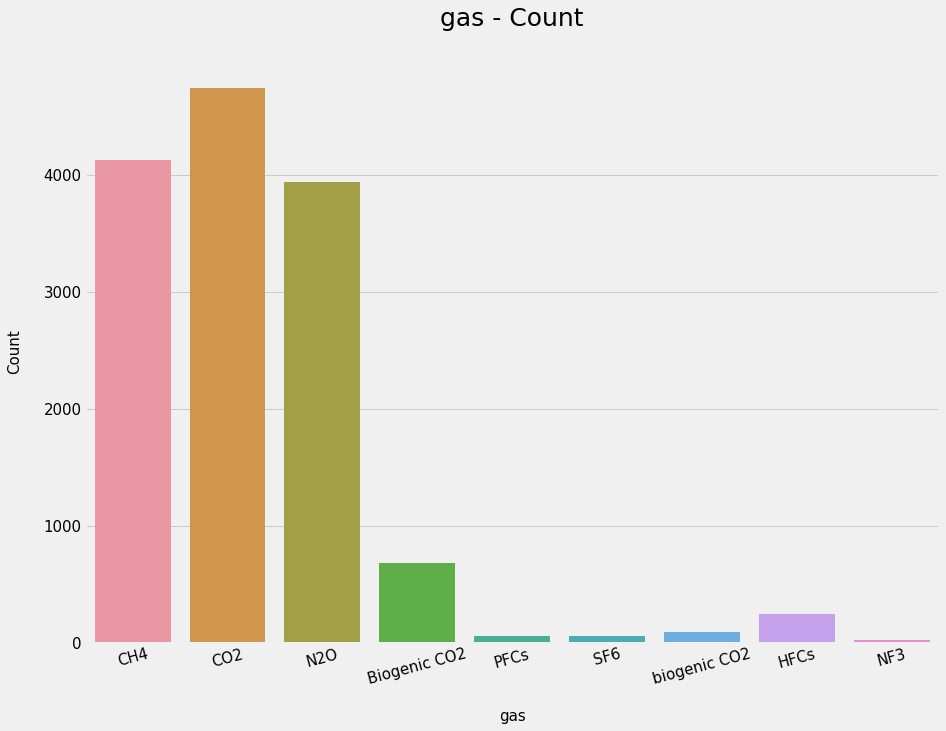

In [41]:
Categorical_Plot("gas")

In [42]:
def Categorical_Plot2(column,rotation=0):
    
        plt.figure(figsize=(30, 10))
        plt.subplot(1, 2, 1)
        sns.barplot(x = df1[column], y = df1.mt_co2e_ar5_20_yr)
        plt.xticks( horizontalalignment="center", fontsize=15, rotation = rotation )
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - mt_co2e_ar5_20_yr\n", fontsize = 20)
        plt.ylabel("mt_co2e_ar5_20_yr\n", fontsize=15)
        
        plt.subplot(1, 2, 2)
        sns.barplot(x = df1[column], y = df1.mt_co2e_ar4_100_yr)
        plt.xticks( horizontalalignment="center", fontsize=15, rotation = rotation )
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - mt_co2e_ar4_100_yr\n", fontsize = 20)
        plt.ylabel("mt_co2e_ar4_100_yr\n", fontsize=15)

        
        plt.show()
        print()

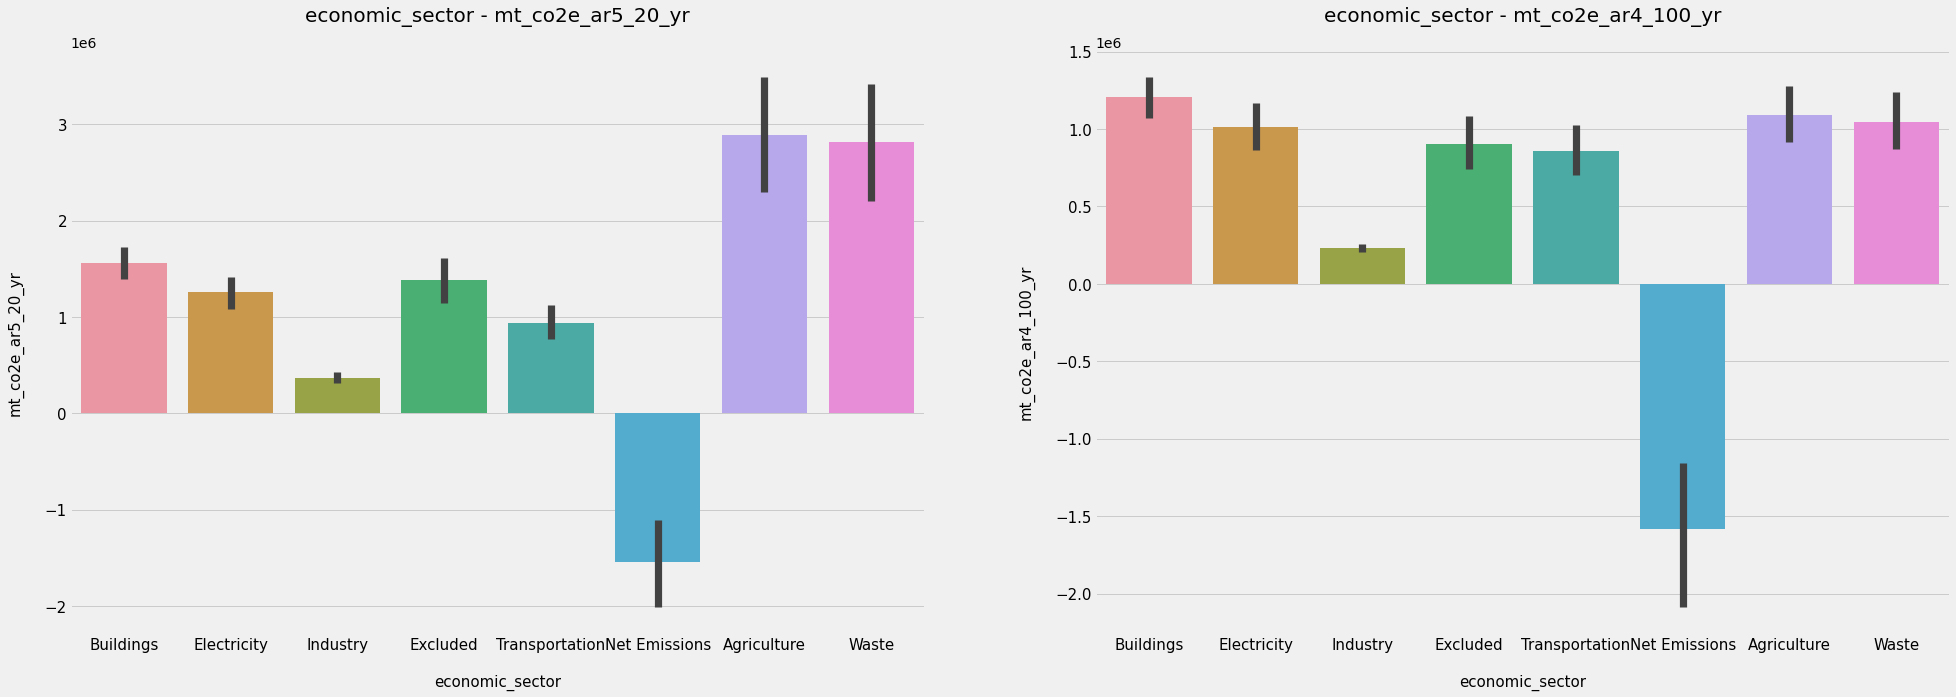

In [24]:
Categorical_Plot2("economic_sector")

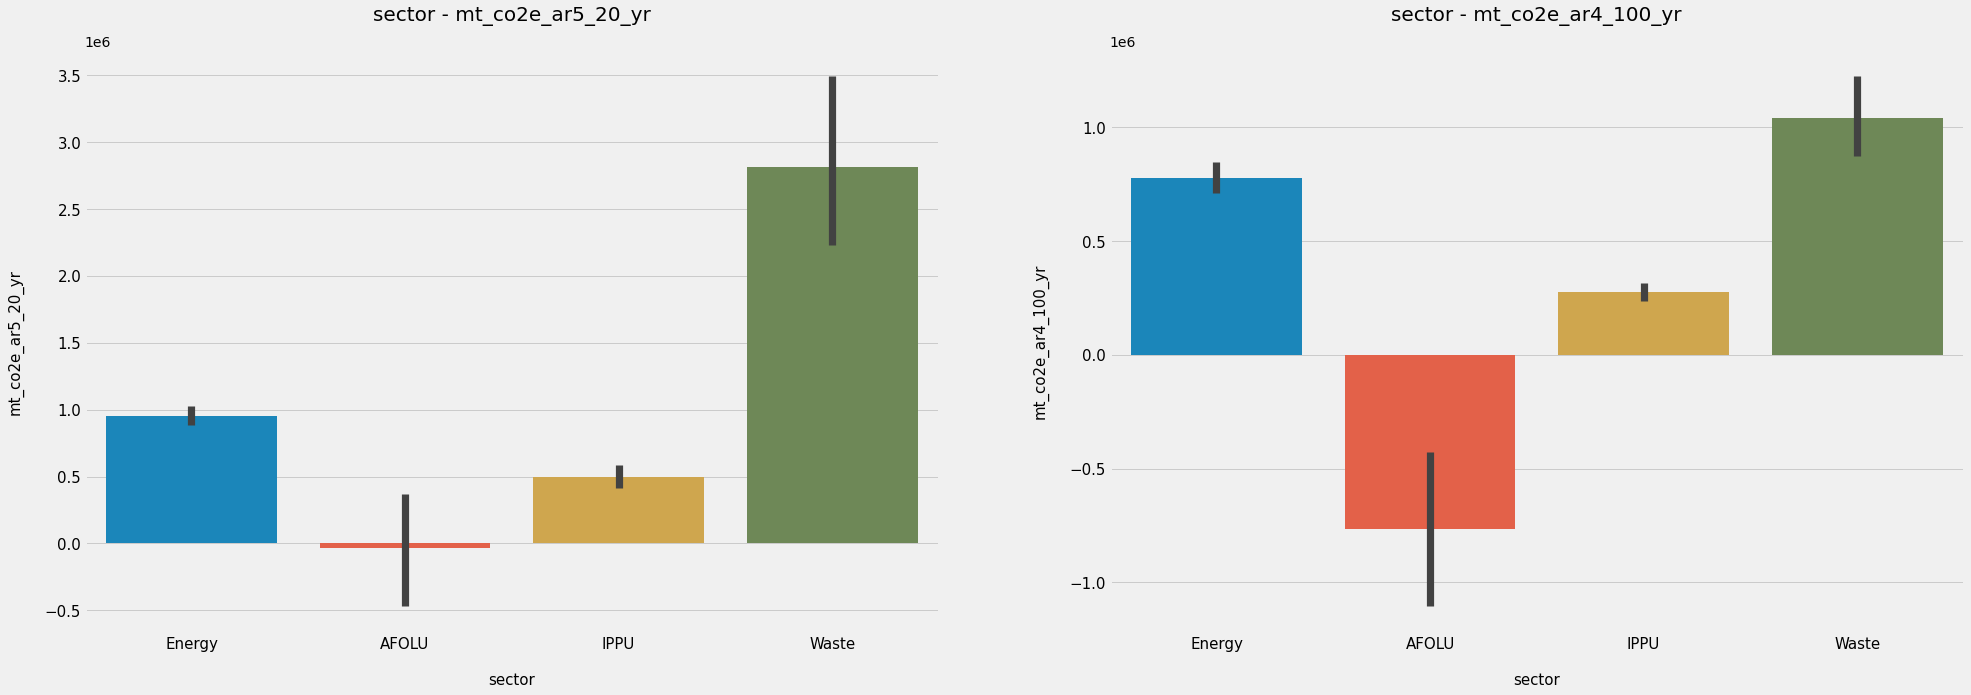

In [25]:
Categorical_Plot2("sector")

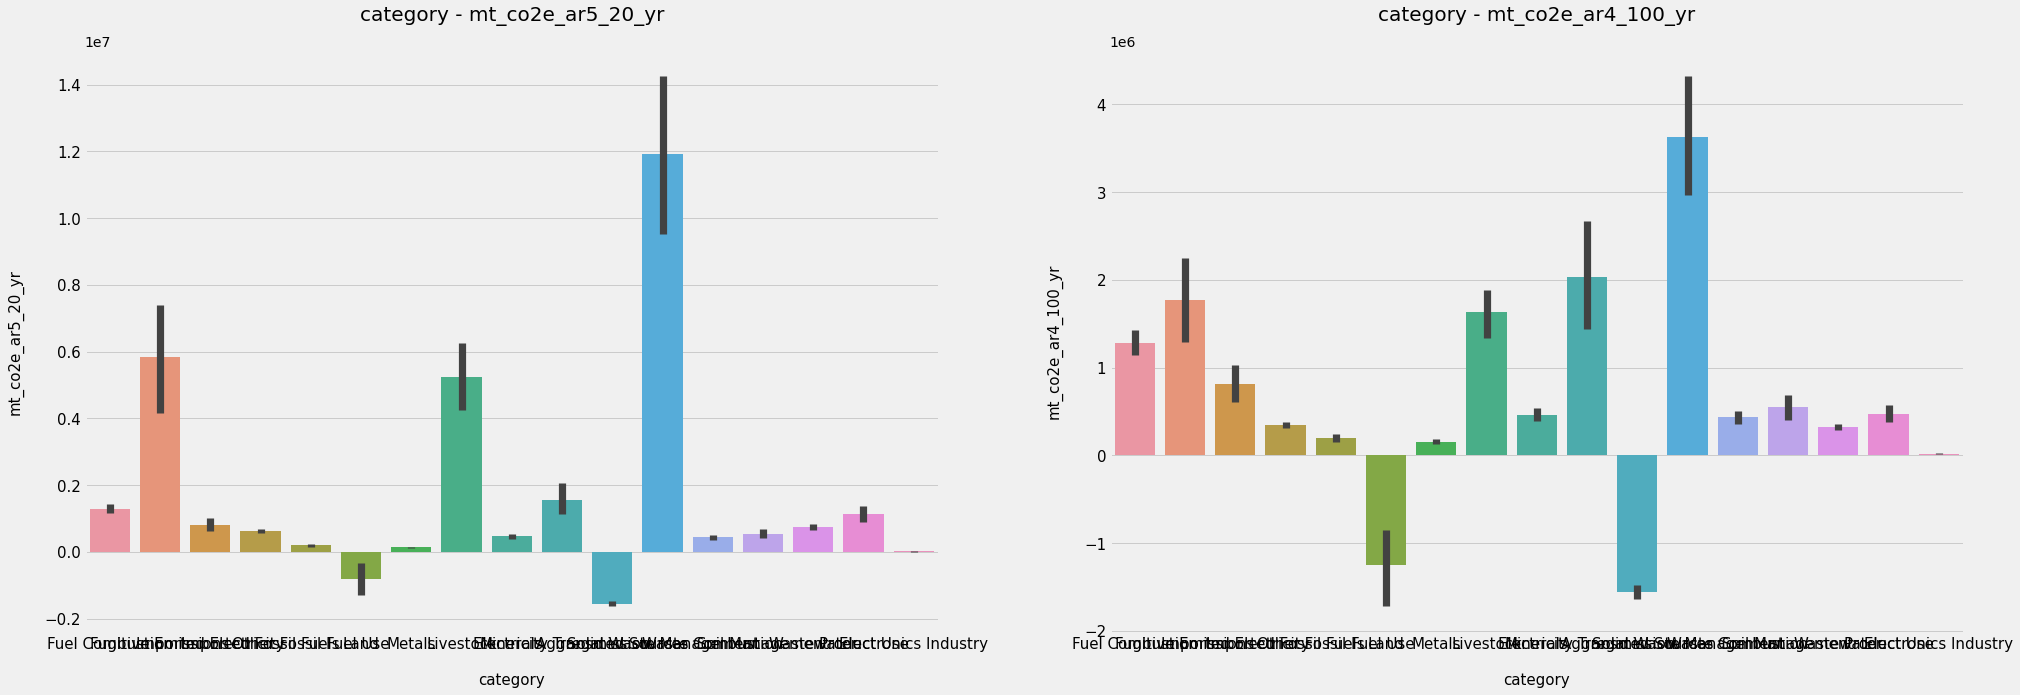

In [26]:
Categorical_Plot2("category")

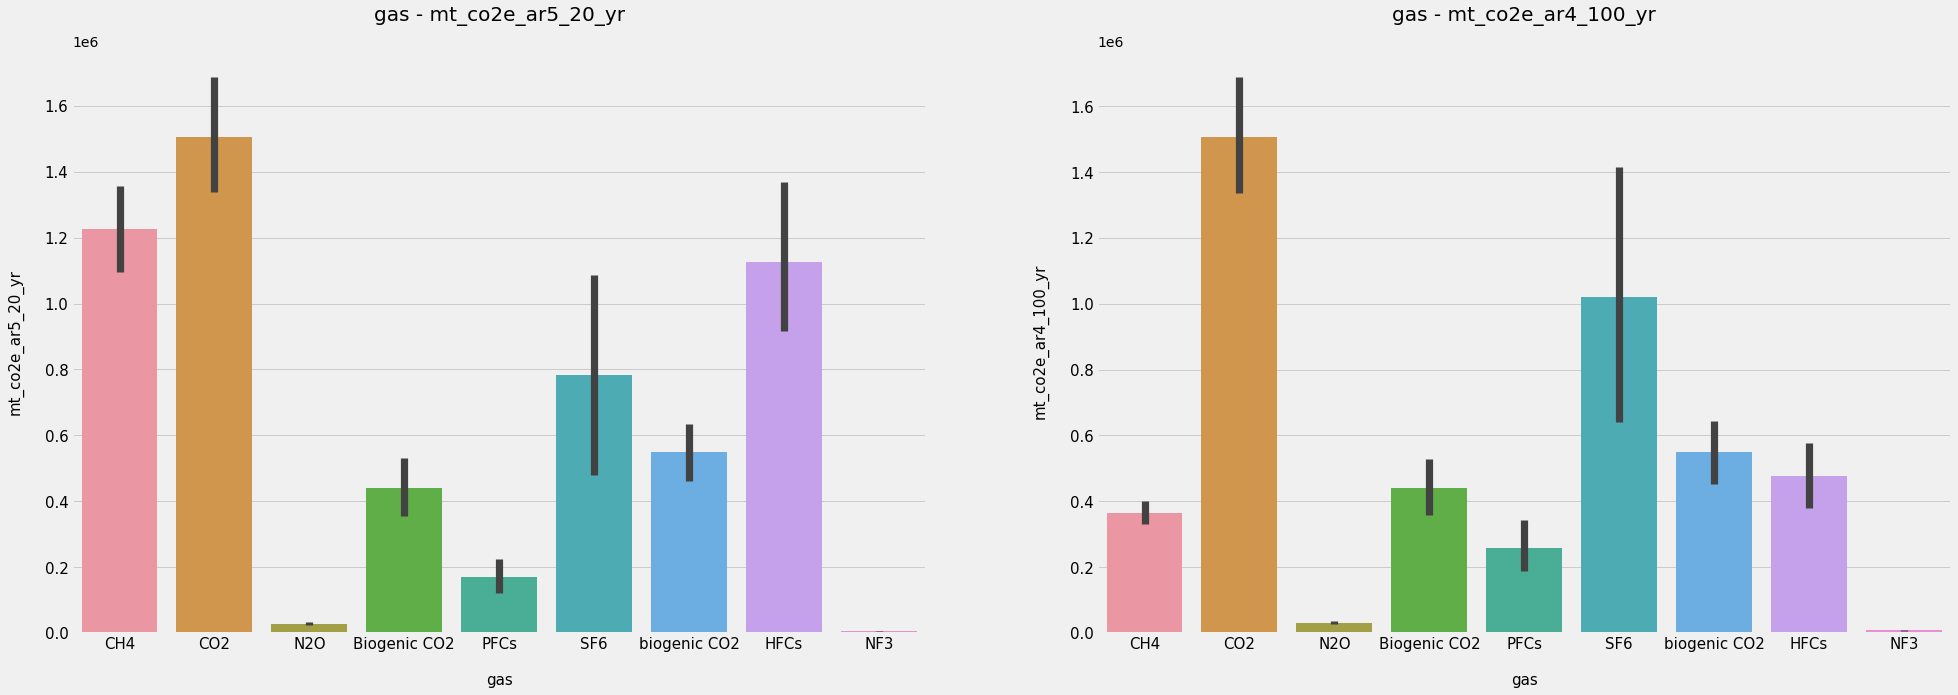

In [27]:
Categorical_Plot2("gas")

In [28]:
# make function for box plots and scatter plots for Numerical features

def Numerical_Plot(column):
    
       
        
        plt.subplot(1,2,1)
        plt.grid(color='black', linestyle='-', linewidth=0.25)
        sns.boxplot(df1[column],color='skyblue')
        plt.xticks( horizontalalignment="center", fontsize=15)
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"\n{str(column)} Box Plot\n", fontsize = 15)


        plt.show()
        print()

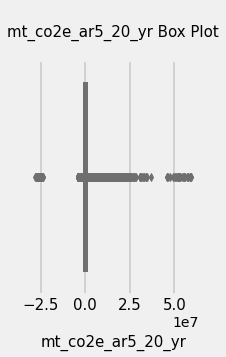

In [29]:
Numerical_Plot("mt_co2e_ar5_20_yr")

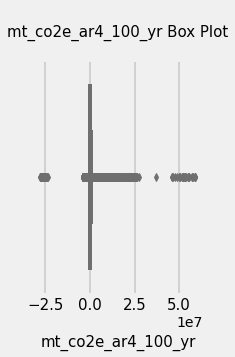

In [30]:
Numerical_Plot("mt_co2e_ar4_100_yr")

### Bi-variate analysis

In [31]:
# Creating a function to plot relation b/w discrete varibale vs sale price

def discrete_plot(df1, discrete_col, mapping_key):
    try:
        plt.figure(figsize=(20, 5))
        
        plt.subplot(1, 2, 1) 
        df.groupby(discrete_col)['mt_co2e_ar5_20_yr'].sum().plot()        # line plot
        plt.title(f"{discrete_col} vs mt_co2e_ar5_20_yr", fontsize = 14)
        plt.xticks(horizontalalignment="center", fontsize=14) #, rotation = 90)
        plt.yticks(fontsize = 14)
        plt.xlabel(f"{discrete_col}", fontsize=14)
        plt.ylabel("Median mt_co2e_ar5_20_yr", fontsize=14)
        

        plt.subplot(1, 2, 2) 
        df.groupby(discrete_col)['mt_co2e_ar4_100_yr'].sum().plot()        # line plot
        plt.title(f"{discrete_col} vs mt_co2e_ar4_100_yr", fontsize = 14)
        plt.xticks(horizontalalignment="center", fontsize=14) #, rotation = 90)
        plt.yticks(fontsize = 14)
        plt.xlabel(f"{discrete_col}", fontsize=14)
        plt.ylabel("Median mt_co2e_ar4_100_yr", fontsize=14)
      

        plt.show()
        print()
    except:
        print()

In [32]:
discrete_plot(df1,Year, None)

NameError: name 'Year' is not defined

## Top 10 Gas emission by Sectors


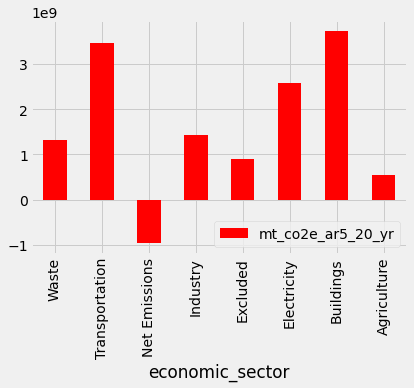

In [54]:
df1[['mt_co2e_ar5_20_yr','economic_sector']].groupby(["economic_sector"]).sum().sort_values(by='economic_sector',ascending=False).head(10).plot.bar(color='r')
plt.show()

### Cumulative CO2 Emisiion since 1990

In [33]:
px.line(df1, x = 'year', y = 'mt_co2e_ar5_20_yr', color='gas')

<AxesSubplot:xlabel='year', ylabel='mt_co2e_ar5_20_yr'>

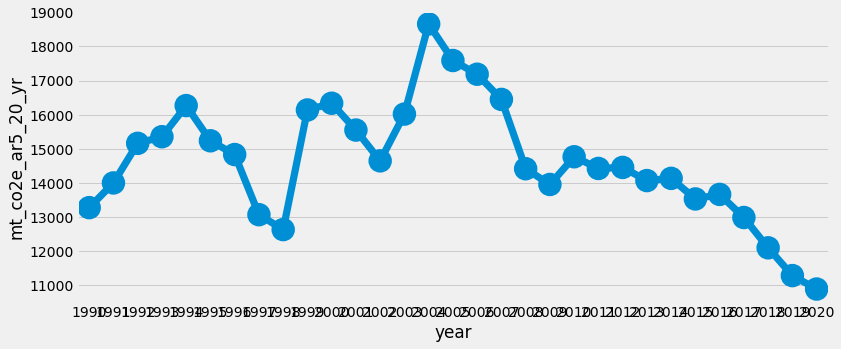

In [34]:
df4 = df1[['mt_co2e_ar5_20_yr','year','economic_sector']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(12,5))
sns.pointplot(x='year', y='mt_co2e_ar5_20_yr', data=df4)

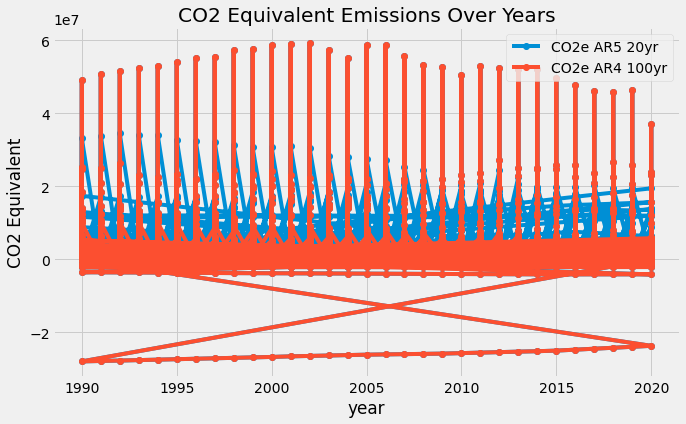

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(df1['year'], df1['mt_co2e_ar5_20_yr'], marker='o', label='CO2e AR5 20yr')
plt.plot(df1['year'], df1['mt_co2e_ar4_100_yr'], marker='o', label='CO2e AR4 100yr')
plt.xlabel('year')
plt.ylabel('CO2 Equivalent')
plt.title('CO2 Equivalent Emissions Over Years')
plt.legend()
plt.grid(True)
plt.show()

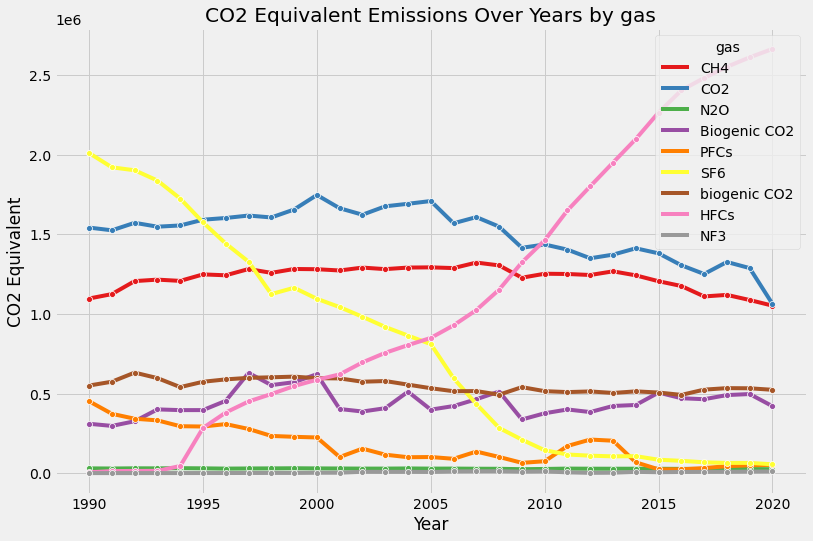

In [53]:


# Visualization - Line plot for CO2e_AR5_20yr and CO2e_AR4_100yr grouped by Year and Economic Sector
plt.figure(figsize=(12, 8))

sns.lineplot(data=df1, x='year', y='mt_co2e_ar5_20_yr', hue='gas', marker='o', palette='Set1', ci=None)
#sns.lineplot(data=df1, x='year', y='mt_co2e_ar4_100_yr', hue='gas', marker='o', palette='Set2', ci=None)

plt.xlabel('Year')
plt.ylabel('CO2 Equivalent')
plt.title('CO2 Equivalent Emissions Over Years by gas')
plt.legend(title='gas')
plt.grid(True)
plt.show()
